In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
dt = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')


In [9]:
categorical_features = df.select_dtypes(include=['object']).columns
print('Categorical')
print(categorical_features)
print('Numerical')
numerical_features = df.select_dtypes(exclude = ["object"]).columns
print(numerical_features)
df_num=df[numerical_features]
df_cat=df[categorical_features]

Categorical
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfB

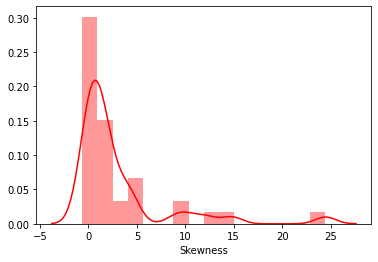

In [3]:
sns.distplot(df.skew(),color='red',axlabel ='Skewness')

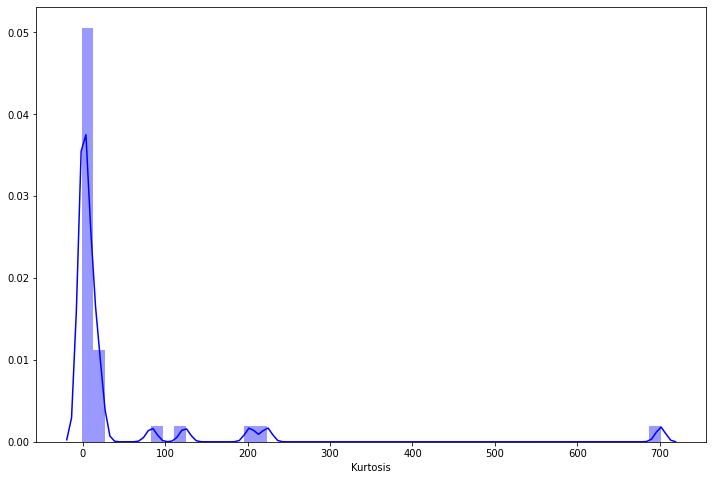

In [4]:
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='blue',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

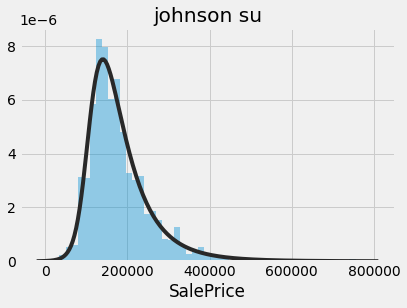

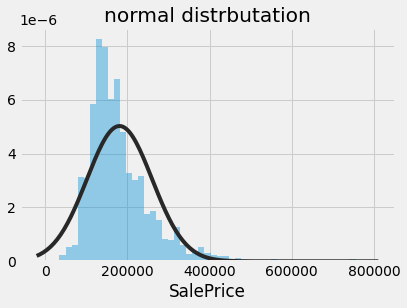

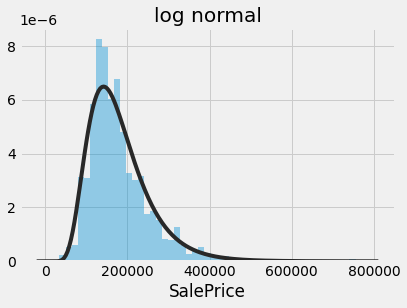

In [5]:
%matplotlib inline
import scipy.stats as st
y=df['SalePrice']
plt.style.use('fivethirtyeight')
plt.figure(1);
plt.title('johnson su')
sns.distplot(y,kde=False,fit=st.johnsonsu)
plt.figure(2);
plt.title('normal distrbutation')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(3);
plt.title('log normal')
sns.distplot(y,kde=False,fit=st.lognorm)

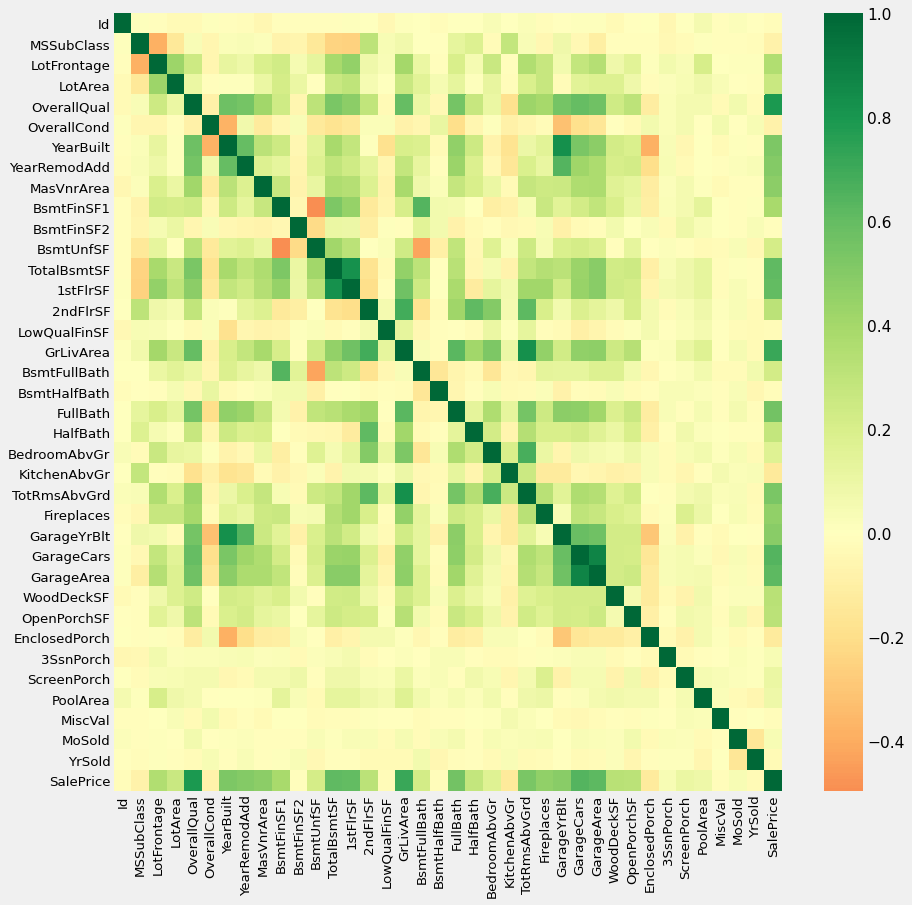

In [6]:
import seaborn as sns
plt.figure(figsize=(12,12), dpi= 80)
sns.heatmap(df.corr(), cmap='RdYlGn', center=0)

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [7]:
df_corr=df.corr()['SalePrice'][:-1]
feature_list=df_corr[abs(df_corr)>0.5].sort_values(ascending=False)
feature_list

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

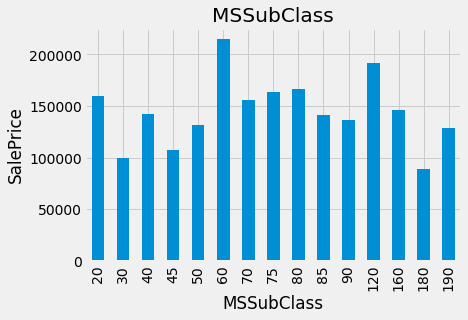

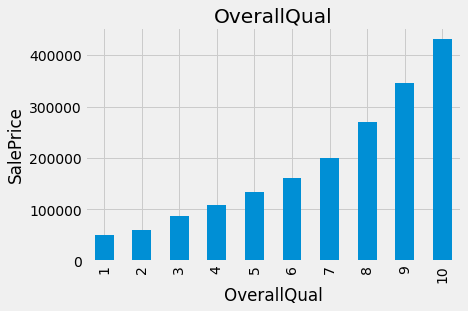

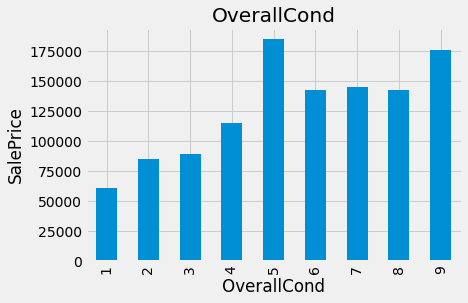

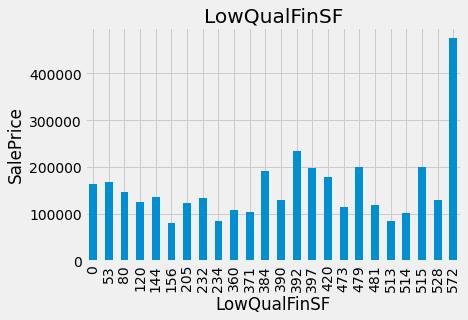

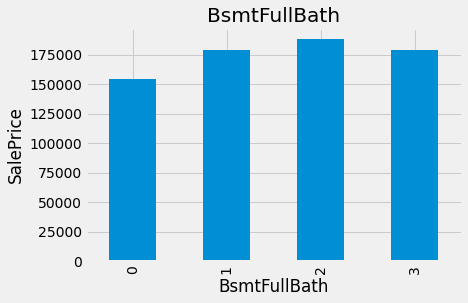

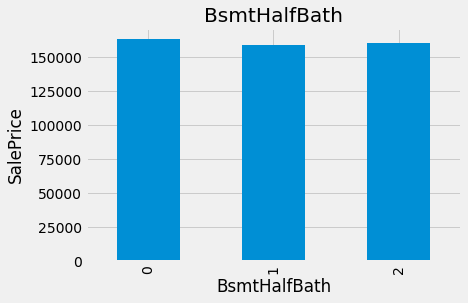

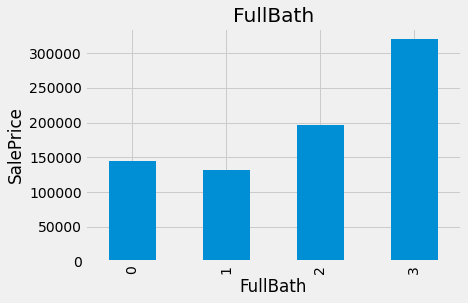

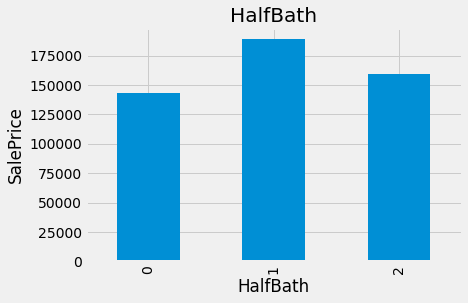

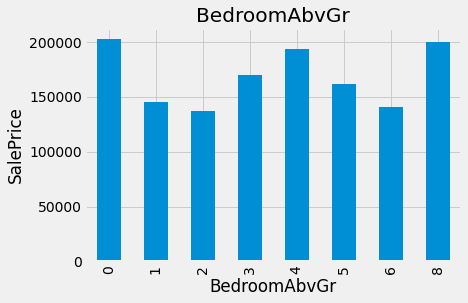

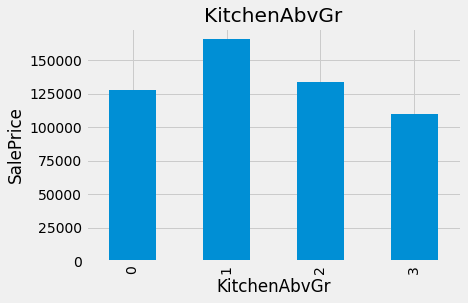

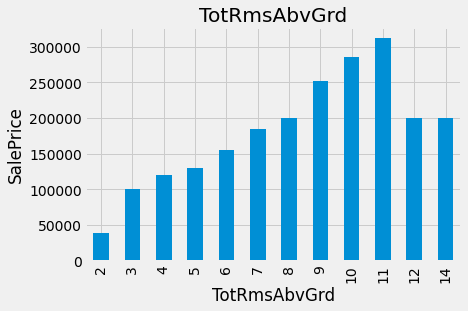

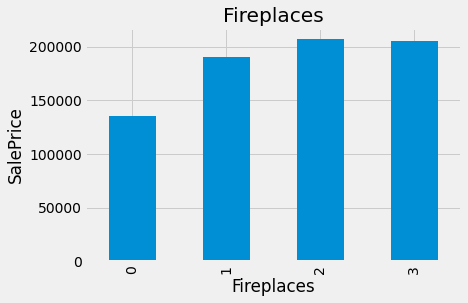

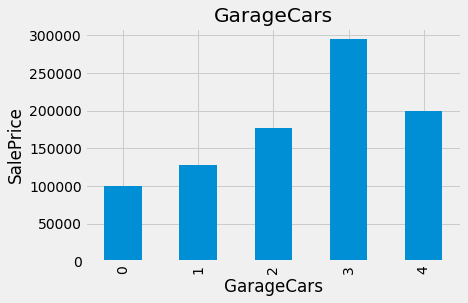

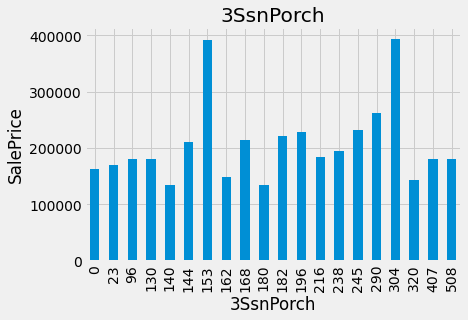

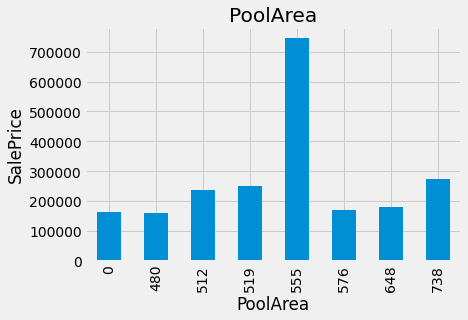

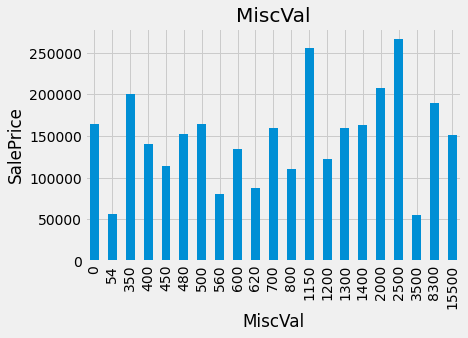

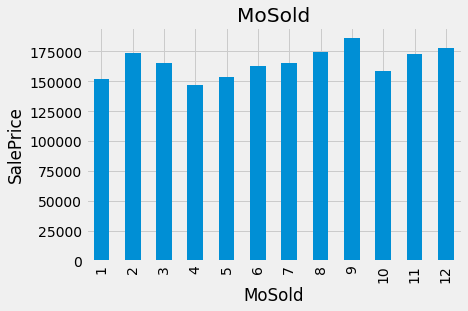

In [10]:
year_feature = [feature for feature in df_num if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in df_num if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

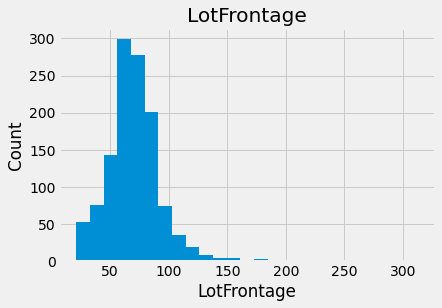

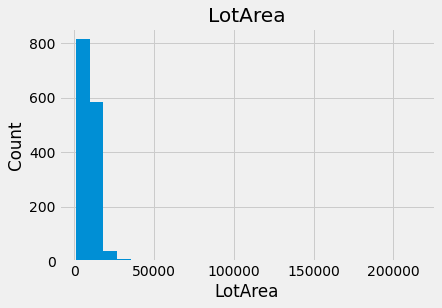

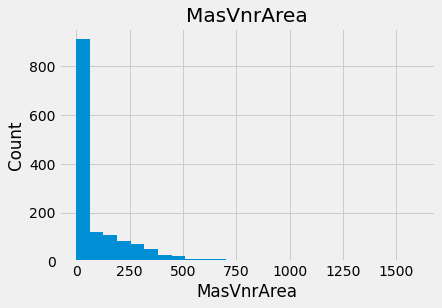

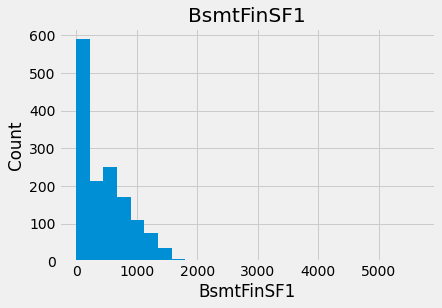

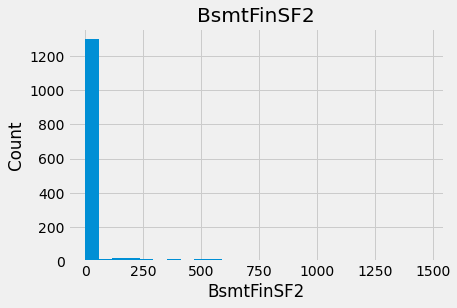

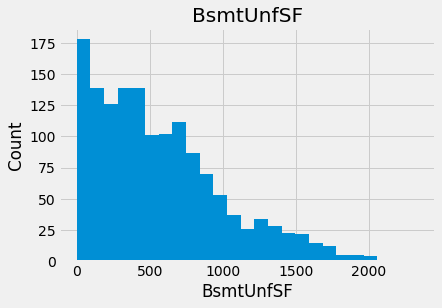

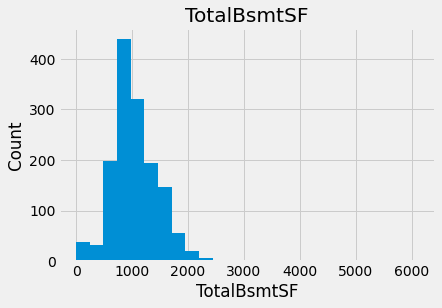

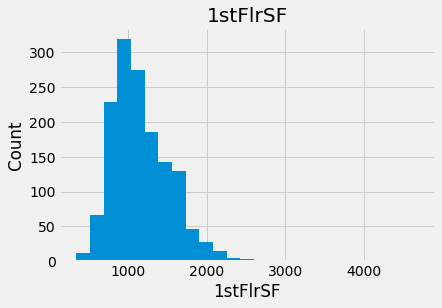

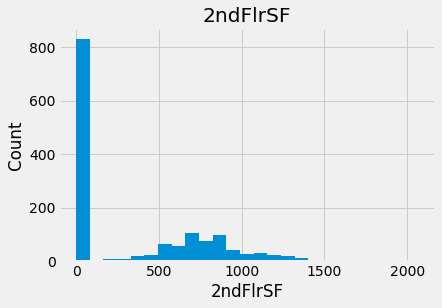

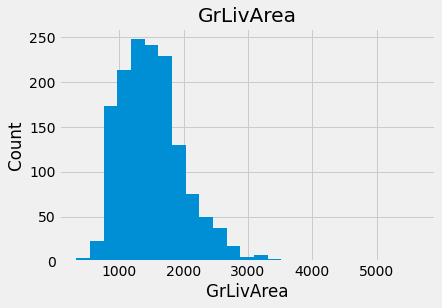

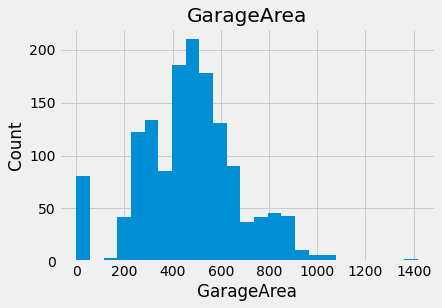

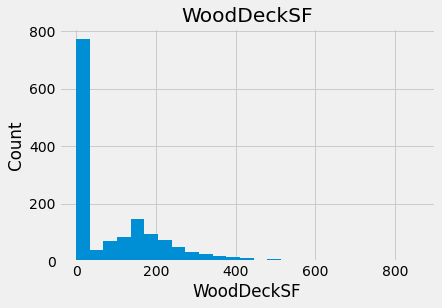

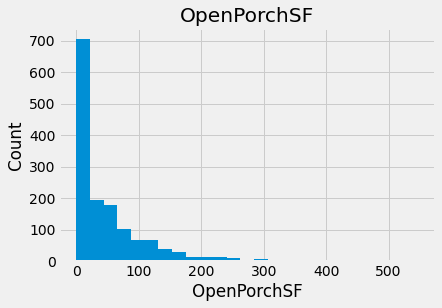

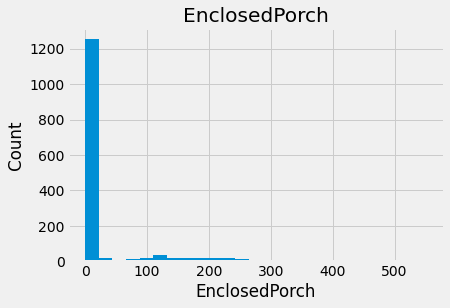

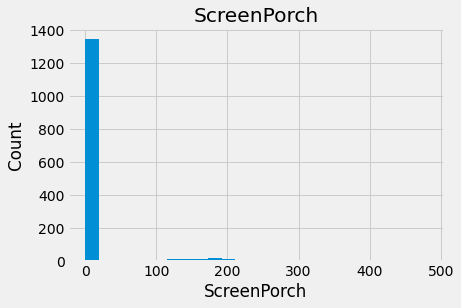

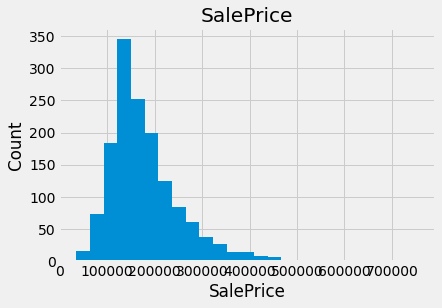

In [11]:
continuous_feature=[feature for feature in df_num if feature not in discrete_feature+year_feature+['Id']]
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [12]:
dy=pd.DataFrame(df.groupby('YrSold')['SalePrice'].mean().reset_index().values,
                    columns=["YrSold","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice over the Year Sold",'xaxis':{'title':"Year Sold"}
                        ,'yaxis':{'title':"Average SalePrice"}})
# Add traces
fig.add_trace(go.Bar(x=dy.YrSold, y=dy.SalePrice,marker=dict(color="blue")))
fig.show()

In [13]:
dy=pd.DataFrame(df.groupby('MoSold')['SalePrice'].mean().reset_index().values,
                    columns=["MoSold","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice over the Month Sold",'xaxis':{'title':"Month Sold"}
                        ,'yaxis':{'title':"Average SalePrice"}})
# Add traces
fig.add_trace(go.Scatter(x=dy.MoSold, y=dy.SalePrice))
fig.show()

In [ ]:
dy=pd.DataFrame(df.groupby('SaleType')['SalePrice'].mean().reset_index().values,
                    columns=["SaleType","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice with Respect to SaleType",'xaxis':{'title':"Sale Type"}
                        ,'yaxis':{'title':"Average SalePrice"}})

# Add traces
fig.add_trace(go.Bar(x=dy.SaleType, y=dy.SalePrice,marker=dict(color="brown")))
fig.show()

In [15]:
dy=pd.DataFrame(df.groupby('Neighborhood')['SalePrice'].mean().reset_index().values,
                    columns=["Neighborhood","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice over the Neighborhood",'xaxis':{'title':"Neighborhood"}
                        ,'yaxis':{'title':"Average SalePrice"},'xaxis_tickangle':-45})
# Add traces
fig.add_trace(go.Scatter(x=dy.Neighborhood, y=dy.SalePrice,mode='lines+markers'))
fig.show()

In [16]:
dy=pd.DataFrame(df.groupby('HouseStyle')['SalePrice'].mean().reset_index().values,
                    columns=["HouseStyle","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice with Respect to House Style",'xaxis':{'title':"House Style"}
                        ,'yaxis':{'title':"Average SalePrice"}})

# Add traces
fig.add_trace(go.Bar(x=dy.HouseStyle, y=dy.SalePrice,marker=dict(color="green")))
fig.show()

In [17]:
dy=pd.DataFrame(df.groupby('SaleCondition')['SalePrice'].mean().reset_index().values,
                    columns=["SaleCondition","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice with Respect to SaleType",'xaxis':{'title':"Sale Condition"}
                        ,'yaxis':{'title':"Average SalePrice"}})

# Add traces
fig.add_trace(go.Bar(x=dy.SaleCondition, y=dy.SalePrice,marker=dict(color="black")))
fig.show()

In [18]:
df['saletype'] = 'Low Range'
df.loc[(df['SalePrice'] >= 143000) & (df['SalePrice'] <= 254000), 'saletype'] = 'Medium Range'
df.loc[(df['SalePrice'] > 254000), 'saletype'] = 'High Range'

df_flight = pd.DataFrame(df['saletype'].value_counts().reset_index().values, columns=["saletype", "AggregateType"])
labels = ["Low Range","Medium Range","High Range"]
value = [df_flight['AggregateType'][0],df_flight['AggregateType'][1],df_flight['AggregateType'][2]]
# colors=['lightcyan','cyan','royalblue']
figs = go.Figure(data=[go.Pie(labels=labels, values=value, pull=[0, 0, 0.2],textinfo = 'label+percent', hole = 0.35, 
                              hoverinfo="label+percent")],layout={'title':"SalePrice by Range",
                                                'annotations':[dict(text='<b>Saleprice<b>', x=0.5, y=0.5, font_size=11, showarrow=False)]})
figs.update_traces( textinfo='label + percent', textfont_size=10)
figs.show()

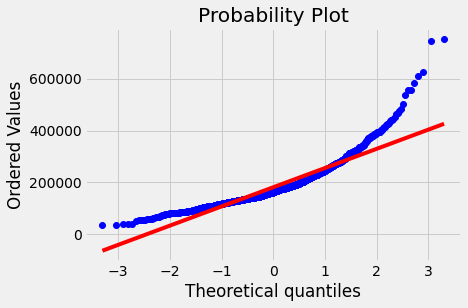

In [19]:
from scipy import stats
from scipy.stats import norm, skew
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

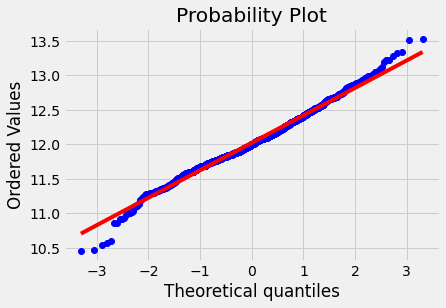

In [20]:
x=df
x['SalePrice']=np.log1p(x['SalePrice'])
fig = plt.figure()
res = stats.probplot(x['SalePrice'], plot=plt)
plt.show()

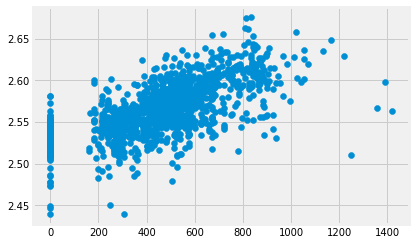

In [21]:
%matplotlib inline
target=np.log1p(df["SalePrice"])
plt.figure(4);
plt.scatter(x=df['GarageArea'],y=target)

(-200.0, 1600.0)

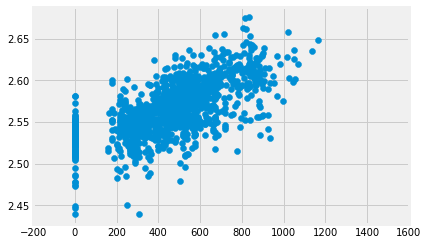

In [22]:
df=df[df['GarageArea']<1200]
target=np.log1p(df["SalePrice"])
plt.figure(9);
plt.scatter(x=df['GarageArea'],y=target)
plt.xlim(-200,1600)

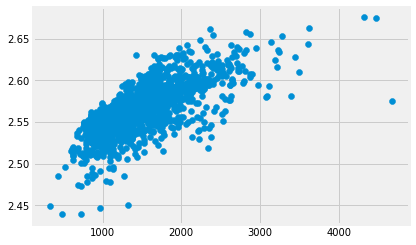

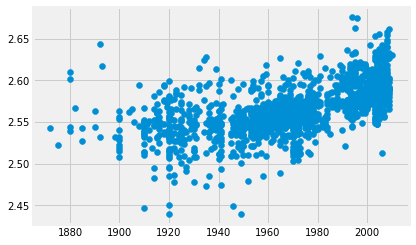

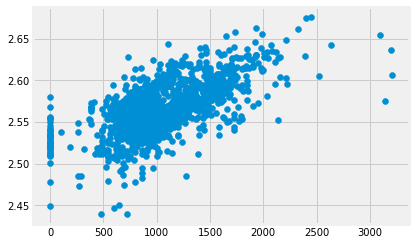

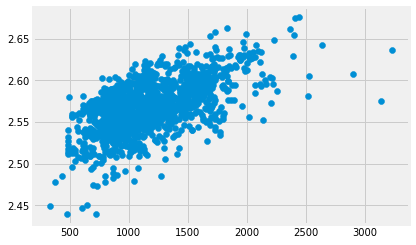

In [23]:
target=np.log1p(df["SalePrice"])
plt.figure(5);
plt.scatter(x=df['GrLivArea'],y=target)
plt.figure(6);
plt.scatter(x=df['YearBuilt'],y=target)
plt.figure(7);
plt.scatter(x=df['TotalBsmtSF'],y=target)
plt.figure(8);
plt.scatter(x=df['1stFlrSF'],y=target)

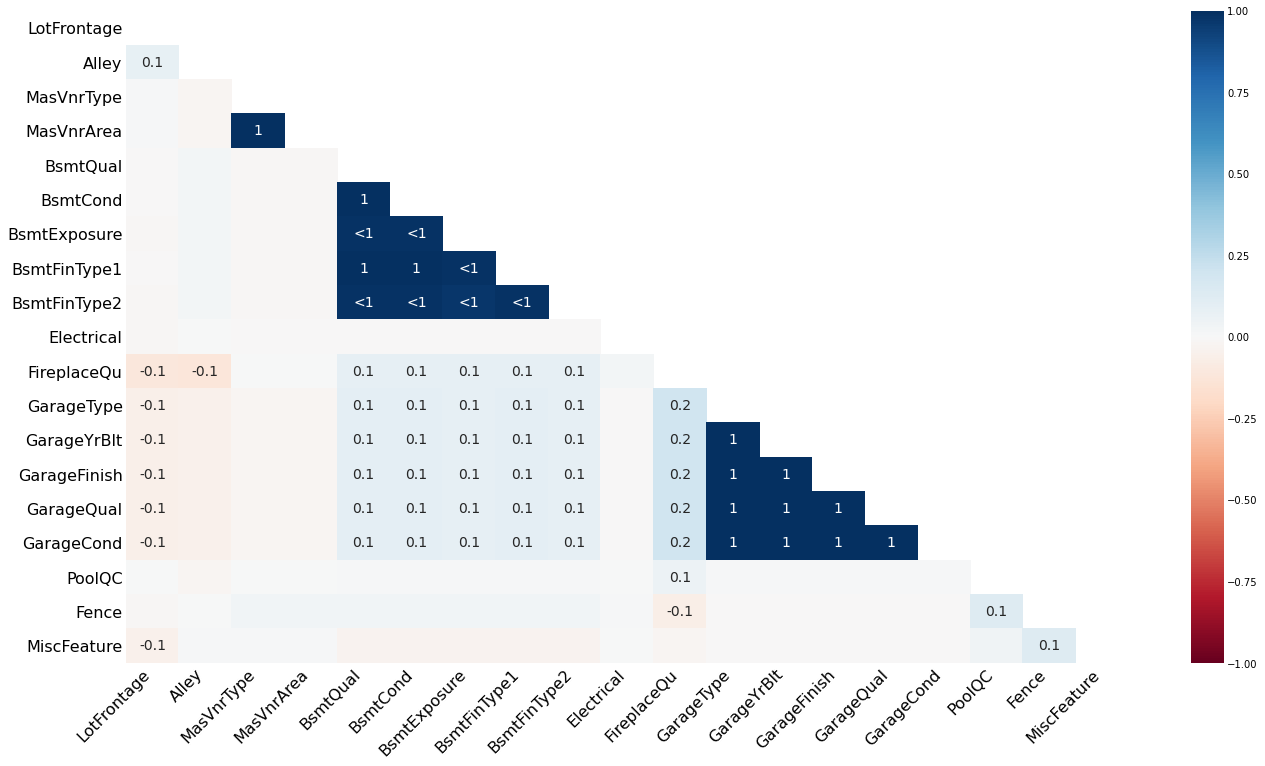

In [24]:
import missingno as msno
msno.heatmap(df)

In [25]:
total=df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1449  0.995876
MiscFeature    1402  0.963574
Alley          1364  0.937457
Fence          1174  0.806873
FireplaceQu     689  0.473540
LotFrontage     258  0.177320
GarageQual       81  0.055670
GarageCond       81  0.055670
GarageFinish     81  0.055670
GarageType       81  0.055670
GarageYrBlt      81  0.055670
BsmtExposure     38  0.026117
BsmtFinType2     38  0.026117
BsmtQual         37  0.025430
BsmtCond         37  0.025430
BsmtFinType1     37  0.025430
MasVnrArea        8  0.005498
MasVnrType        8  0.005498
Electrical        1  0.000687
RoofStyle         0  0.000000

In [26]:
data=pd.concat((df.loc[:,'MSSubClass':'SaleCondition'],
                dt.loc[:,'MSSubClass':'SaleCondition']))

In [27]:
var1=['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']
for v in var1:
  data[v]=data[v].fillna(data[v].mode()[0])
data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

for col in ['GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',"PoolQC",'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
  data[col]=data[col].fillna('None')

for col in ['GarageYrBlt','GarageArea','GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF']:
  data[col]=data[col].fillna(0)

data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

data['Functional']=data['Functional'].fillna('Typ')

data=pd.get_dummies(data)
data.shape

(2914, 302)

In [28]:
print(data.isnull().sum().sum())
data.head(3)

0


MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
0          60         65.0  ...                     1                      0
1          20         80.0  ...                     1                      0
2          60         68.0  ...                     1                      0

[3 rows x 302 columns]

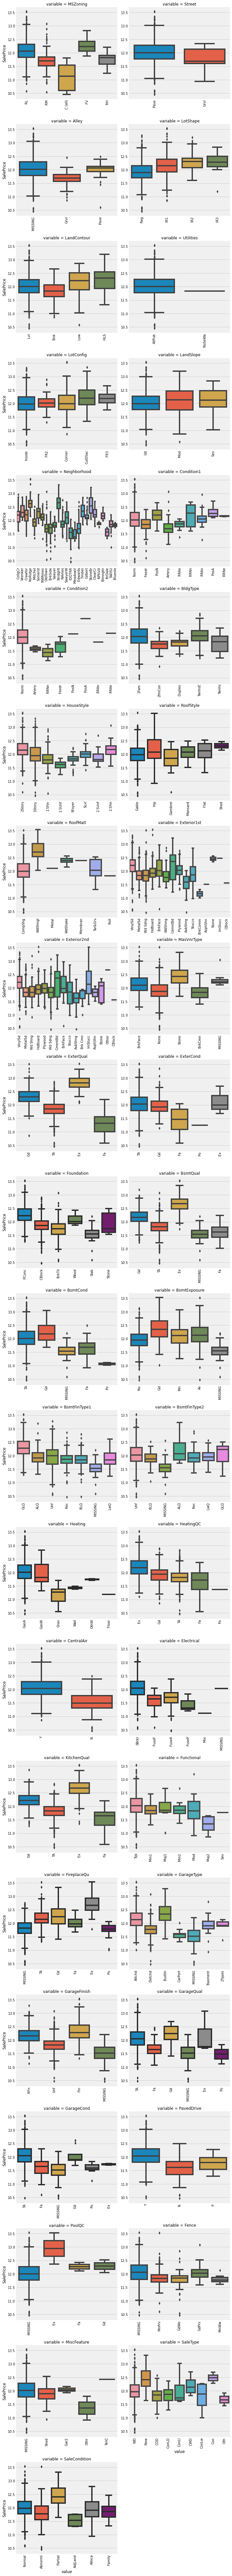

In [29]:
for c in df_cat:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [30]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('SalePrice ~ MSSubClass+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+GarageArea+WoodDeckSF+OpenPorchSF+EnclosedPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold', data=df_num).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     208.7
Date:                Fri, 04 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:51:40   Log-Likelihood:                -17336.
No. Observations:                1460   AIC:                         3.473e+04
Df Residuals:                    1430   BIC:                         3.489e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.827e+05   1.43e+06      0.339

In [31]:
corr=df.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.819117
GrLivArea        0.716058
GarageCars       0.685201
GarageArea       0.668203
TotalBsmtSF      0.641751
1stFlrSF         0.614069
FullBath         0.594465
YearBuilt        0.585547
YearRemodAdd     0.564193
GarageYrBlt      0.542240
TotRmsAbvGrd     0.537093
Fireplaces       0.491352
MasVnrArea       0.429868
BsmtFinSF1       0.388967
LotFrontage      0.374036
WoodDeckSF       0.334872
OpenPorchSF      0.323000
2ndFlrSF         0.321592
HalfBath         0.314807
LotArea          0.261688
BsmtFullBath     0.236167
BsmtUnfSF        0.222569
BedroomAbvGr     0.209945
ScreenPorch      0.121822
PoolArea         0.074609
MoSold           0.057999
3SsnPorch        0.055168
BsmtFinSF2       0.005097
BsmtHalfBath    -0.004957
Id              -0.017036
MiscVal         -0.018611
OverallCond     -0.037699
LowQualFinSF    -0.037974
YrSold          -0.038043
MSSubClass      -0.073423
KitchenAbvGr    -0.147822
EnclosedPorch   -0.149223
Name: SalePr

In [32]:
#creating matrices for sklearn:
X = data[:df.shape[0]]
y = df.SalePrice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcba006b0f0>,
                cv=10, groups=None, logx=False, model=None, n_jobs=1,
                param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                pre_dispatch='all', scoring='r2')

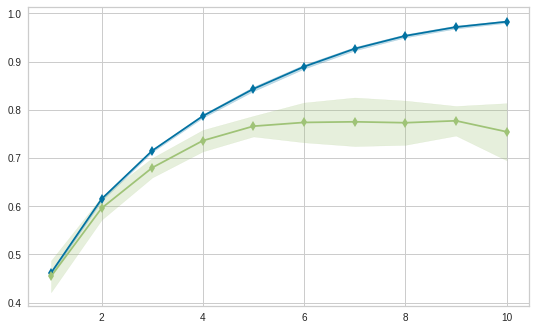

In [34]:
import numpy as np


from yellowbrick.model_selection import ValidationCurve

from sklearn.tree import DecisionTreeRegressor

# Load a regression dataset

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
#viz.show()

In [35]:
import xgboost as xgb
# model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) 
model_xgb = xgb.XGBRegressor(n_estimators=2000, max_depth=6, learning_rate=0.1, 
                             verbosity=1, silent=None, objective='reg:linear', booster='gbtree', 
                             n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                             subsample=0.8, colsample_bytree=0.8, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0.2, reg_lambda=1.2, 
                             scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain') 

In [36]:
model_xgb.fit(X_train, y_train)

[14:53:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.2, reg_lambda=1.2, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

[14:54:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9102340651274244

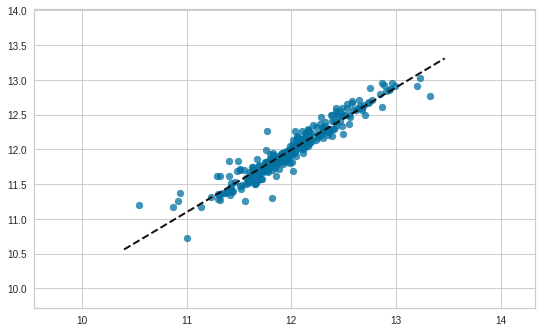

In [38]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model_xgb)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.show()

[14:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9102340651274244

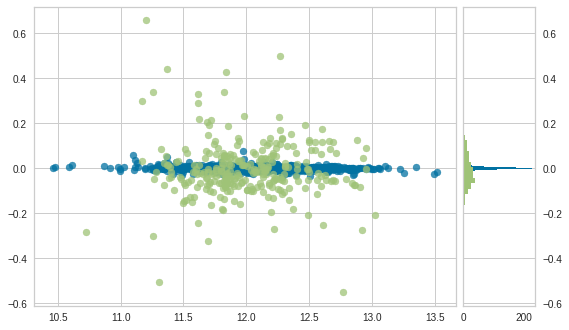

In [39]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_xgb)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.show()

0.8967200541330056

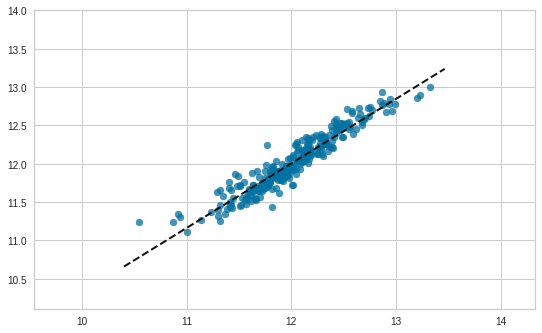

In [40]:
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError
rdf_r=RandomForestRegressor(n_estimators=600,random_state=0, n_jobs= -1)
visualizer = PredictionError(rdf_r)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.show()

0.8967200541330056

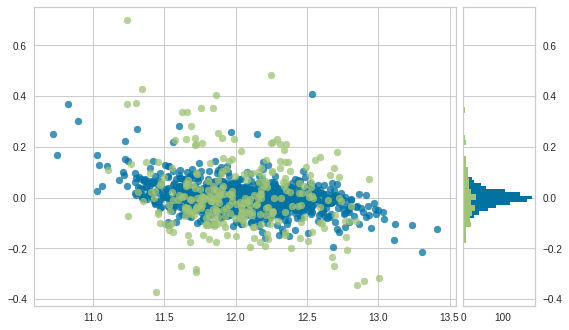

In [41]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rdf_r)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

0.9194398880008439

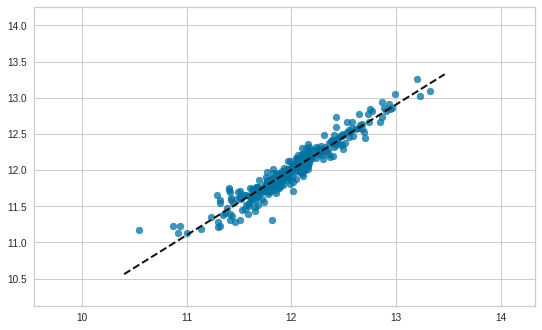

In [43]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError
model_rdg=Ridge(alpha=3.181)
visualizer = PredictionError(model_rdg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.show()

0.9194398880008439

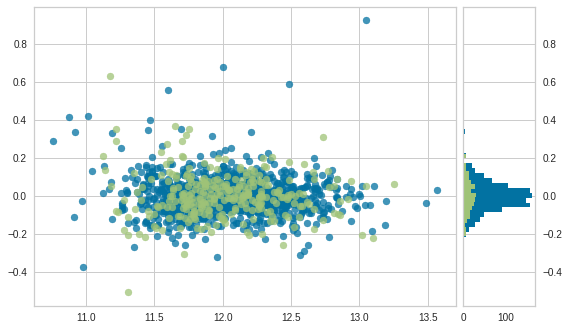

In [44]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_rdg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

0.7496525722383898

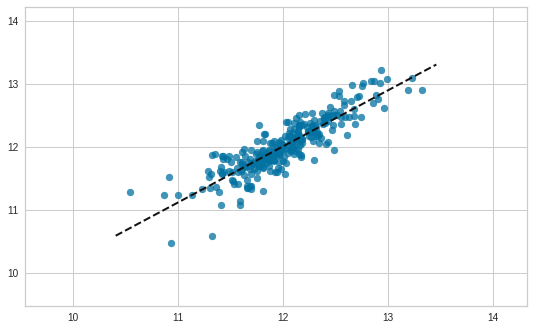

In [47]:
from yellowbrick.regressor import PredictionError
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
visualizer = PredictionError(dtree)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

0.9267771264869507

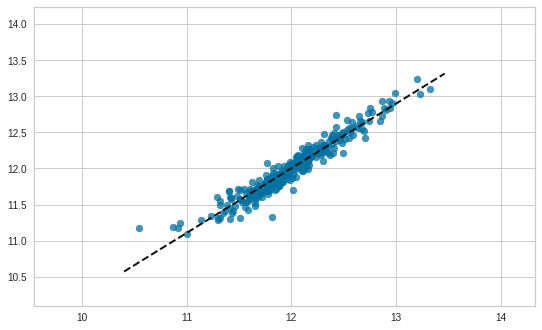

In [48]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model_lasso)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

0.9267771264869507

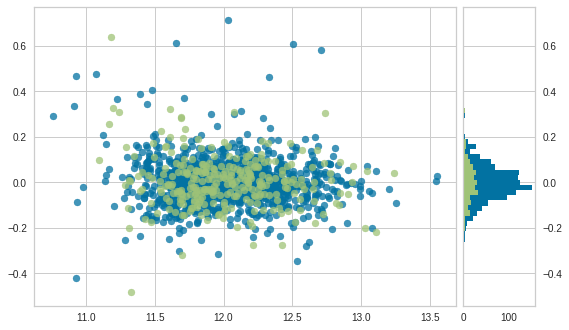

In [49]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_lasso)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

XGBoost : 0.9847602030337149
RandomForestRegressor : 0.9684444042449369
Lasso : 0.9305237612818494
DecisionTree : 0.9676368450728433
Ridge : 0.9416817611041212


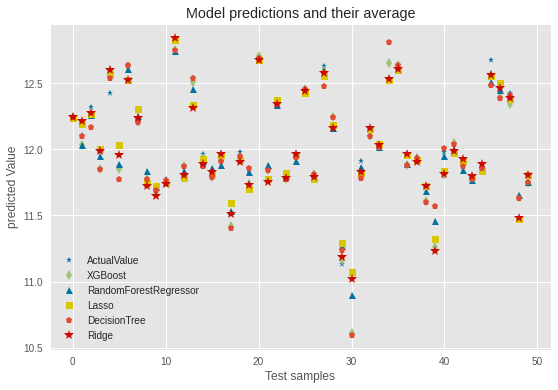

In [50]:
X_test = X[:50]
y_test = y[:50]
pred1 = model_xgb.predict(X_test)
pred2 = rdf_r.predict(X_test)
pred3 = model_lasso.predict(X_test)
pred4 = dtree.predict(X_test)
pred5=model_rdg.predict(X_test)
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.plot(y_test, 'b*', label='ActualValue' )
plt.plot(pred1, 'gd', label='XGBoost')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='Lasso')
plt.plot(pred4, 'p', label='DecisionTree')
plt.plot(pred5, 'r*', ms=10, label='Ridge')

print('XGBoost :',model_xgb.score(X_test, y_test))
print('RandomForestRegressor :',rdf_r.score(X_test, y_test))
print('Lasso :',model_lasso.score(X_test, y_test))
print('DecisionTree :',dtree.score(X_test, y_test))
print('Ridge :',model_rdg.score(X_test, y_test))
# plt.tick_params(axis='x', which='both', bottom=False, top=False,
#                 labelbottom=False)
plt.tick_params(axis='x', which='both', bottom=True, top=True,
                labelbottom=True)
plt.ylabel('predicted Value')
plt.xlabel('Test samples')
plt.legend(loc="best")
plt.title('Model predictions and their average')
plt.show()